# Project GEVPRO (H&M) - MAIN

We will work with the following dataset: 
Source: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview
This dataset has been reduced to use less memory. Only sales data from > 08-01-2020 is selected. 

In [2]:
# Used libaries:
%matplotlib inline
import pandas as pd
import seaborn as sns
df = pd.read_csv('data/customers.csv', low_memory=False)
df = df.dropna(subset=['age', 'postal_code'])  # drop rows with missing values in this column
df.shape

(1356119, 7)

### 0.  Research questions:
We try to answer the following research questions:
1. 
2. 
3. 




### 1.  Reducing the dataset: 
This is only ran on the default dataset (transactions_train.csv) found on kaggle to reduce the memory size to 91.3mb (instead of 3+gb).

In [3]:
# df = pd.read_csv('data/transactions_train.csv', low_memory=False)
# df['t_dat'] = pd.to_datetime(df['t_dat'])
# mask = df['t_dat'] > '08-01-2020'
# df_reduced = df.loc[mask]
# df_reduced.to_csv('C:\\Users\\Nils\\Jupyter Notebooks\\Project_gevpro\\transactions_reduced.csv')

In [4]:
# This loads the reduced transaction (sales) dataset.
df = pd.read_csv('data/transactions_reduced.csv', low_memory=False)

### 2. Exploring the data

In [5]:
df = pd.read_csv('data/customers.csv', low_memory=False)

1. what is the most frequent age of people shopping at H&M

In [6]:
#What are the 10 most frequent ages?
df["age"].value_counts().head(10)


21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
26.0    53658
22.0    51869
27.0    49134
28.0    44294
29.0    40697
Name: age, dtype: int64

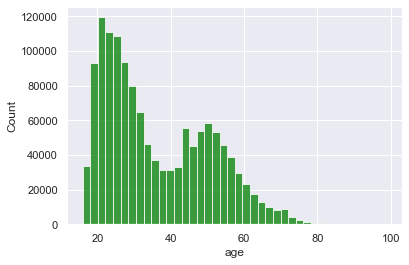

In [7]:
#What is the distribution of this age?
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="age", data=df, color='green', bins=40)

2. What is the most frequent postal code? 

In [8]:
#what are the 10 most frequent postal codes
df['postal_code'].value_counts().head(10)

#the most frequent postal code appears to be a value that gives 118002

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c       154
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358       141
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd       138
087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb       134
4d22901a97bd952bb92cdd31b38c39b41dd3250a735cabdfac1503eb405b807d       132
Name: postal_code, dtype: int64

3. Club memberships

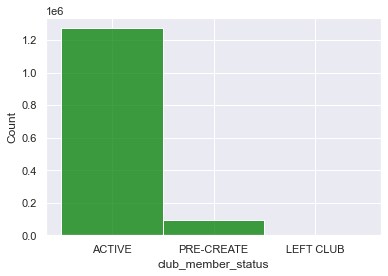

In [9]:
#how many customers have a club_membership?
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="club_member_status", data=df, color='green', bins=40)

#most people have a club membership

In [10]:
#uniting the values that all mean none but have different named values for this 
df.loc[~df['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'

In [11]:
#showing the new values for fashion news frequency
df['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [12]:
#the club_member_status against the fashion news frequency
pd.crosstab(df['club_member_status'], df['fashion_news_frequency'])

#There are no people that leave the club that have monthly news updates 
#The people that have no news updates, the most people that leave the club, dont receive fashion news. 

fashion_news_frequency,Monthly,None,Regularly
club_member_status,,,
ACTIVE,778,800409,471304
LEFT CLUB,0,459,8
PRE-CREATE,59,87114,5787


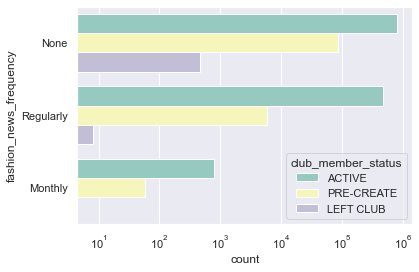

In [13]:
g = sns.countplot(y='fashion_news_frequency', hue='club_member_status', data=df, palette="Set3")
g.set_xscale("log")

#note that the scale is logaritmic, is this oke? 

4. fashion news frequency 

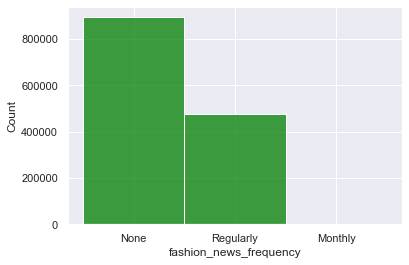

In [14]:
# division of fashion_news_frequency
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="fashion_news_frequency", data=df, color='green', bins=40)

#most people don't like to receive fashion news

In [15]:
#fashion news in relation to age 
pd.crosstab(df['fashion_news_frequency'], df['age'], margins=True)

age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,All
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,0,0,0,6,10,16,16,26,22,31,...,0,0,0,0,0,0,0,0,0,841
None,86,6405,16216,22646,33292,40891,31905,35318,37744,37778,...,12,10,4,2,8,3,3,5,8,879067
Regularly,75,2987,8107,15055,21894,26623,19948,19523,18358,17180,...,4,7,0,1,2,0,1,2,5,476211
All,161,9392,24323,37707,55196,67530,51869,54867,56124,54989,...,16,17,4,3,10,3,4,7,13,1356119


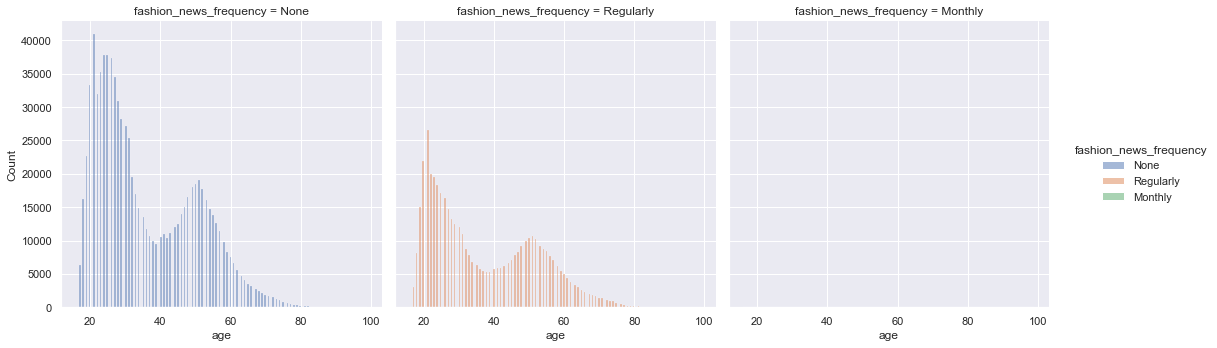

In [16]:

#fashion news frequency in relation to age 
sns.displot(data=df, x="age", hue="fashion_news_frequency", col="fashion_news_frequency")

#the highest amount of people of course dont receive fashion news, 

fashion news in relation to revenue 

In [29]:
# Is it possible to create a jointplot with data from different sets?
#for instance age, sales and fashion news frequency

#is is possible to only select values,
#for instance the top 10 most popular ages and put this against the fashion news frequency
customers = pd.read_csv('data/customers.csv', low_memory=False)
transactions = 'transactions.csv'
merged_df = pd.merge(customers, transactions, on="customer_id", how="inner")


TypeError: Can only merge Series or DataFrame objects, a <class 'str'> was passed